In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-factors-and-their-impact-on-students/student_lifestyle_dataset..csv


## Title : Lifestyle Habits and Student Performance

#### Description: A brief overview of how lifestyle choices—such as sleep, diet, exercise, and screen time—affect academic performance and overall well-being in students.










## Import title

In [2]:
df = pd.read_csv('/kaggle/input/lifestyle-factors-and-their-impact-on-students/student_lifestyle_dataset..csv')

In [3]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


In [4]:
df.tail()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderate,Male,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderate,Female,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderate,Male,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,High,Male,7.60
1999,2000,9.0,1.7,7.3,3.1,2.9,High,Male,8.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


In [6]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


In [7]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
Stress_Level                        object
Gender                              object
Grades                             float64
dtype: object

In [10]:
df.shape

(2000, 9)

In [11]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'Stress_Level', 'Gender', 'Grades'],
      dtype='object')

## Data visualization

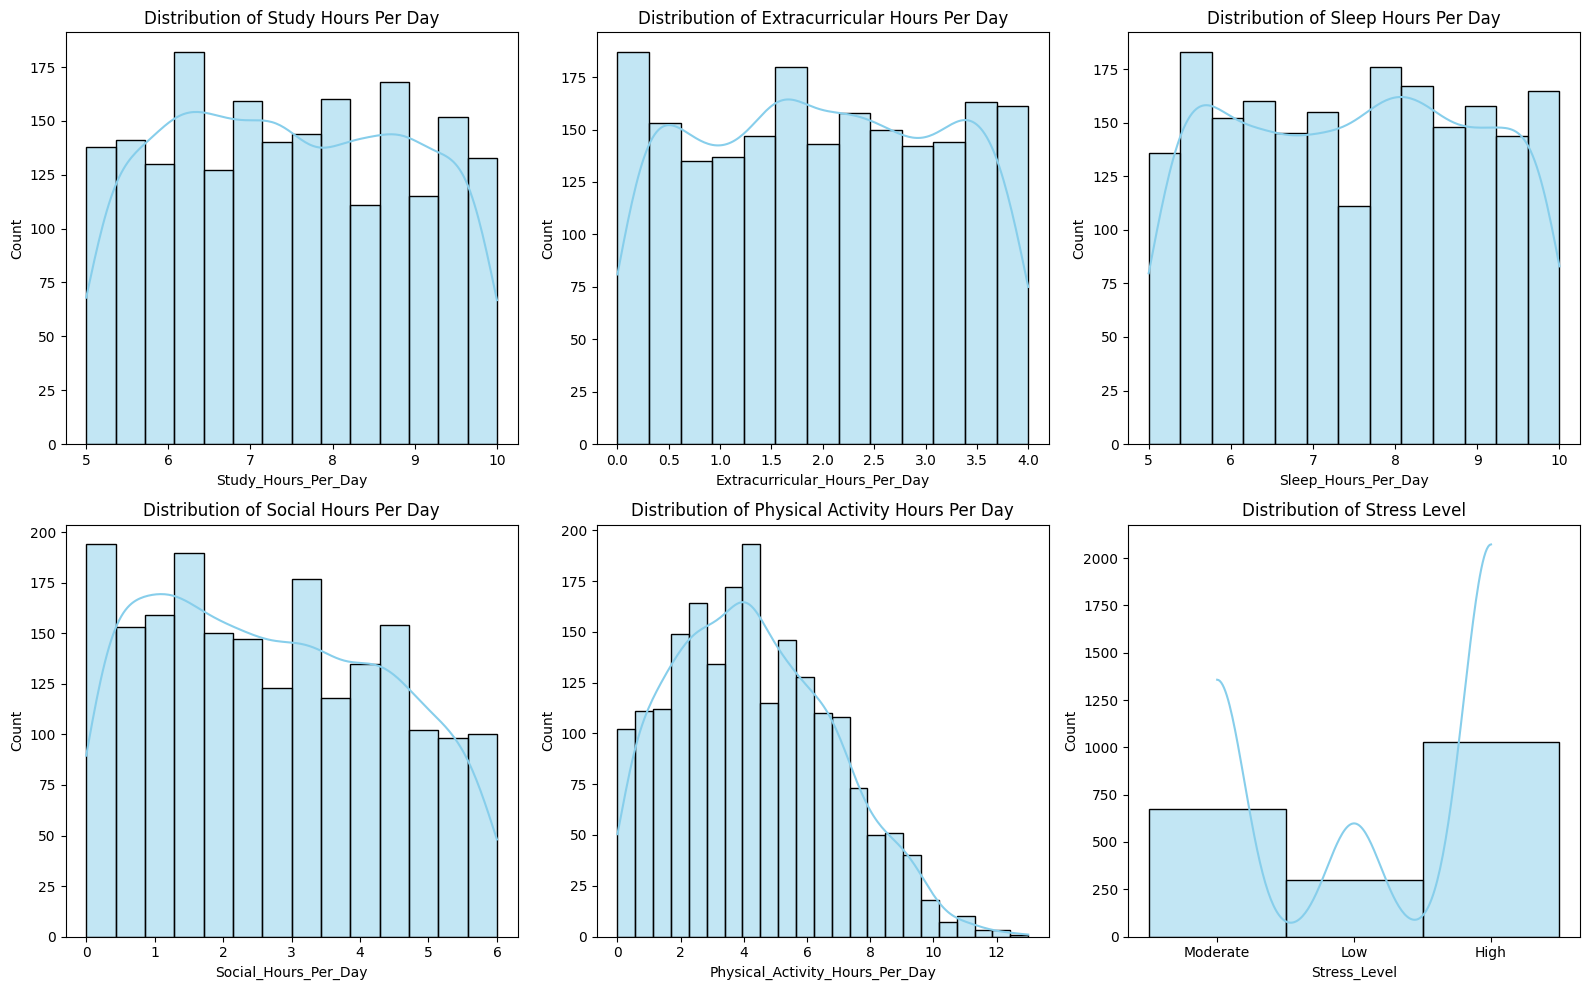

In [12]:
lifestyle_cols = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                  'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                  'Physical_Activity_Hours_Per_Day', 'Stress_Level']

plt.figure(figsize=(16, 10))
for i, col in enumerate(lifestyle_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ")}')

plt.tight_layout()
plt.show()


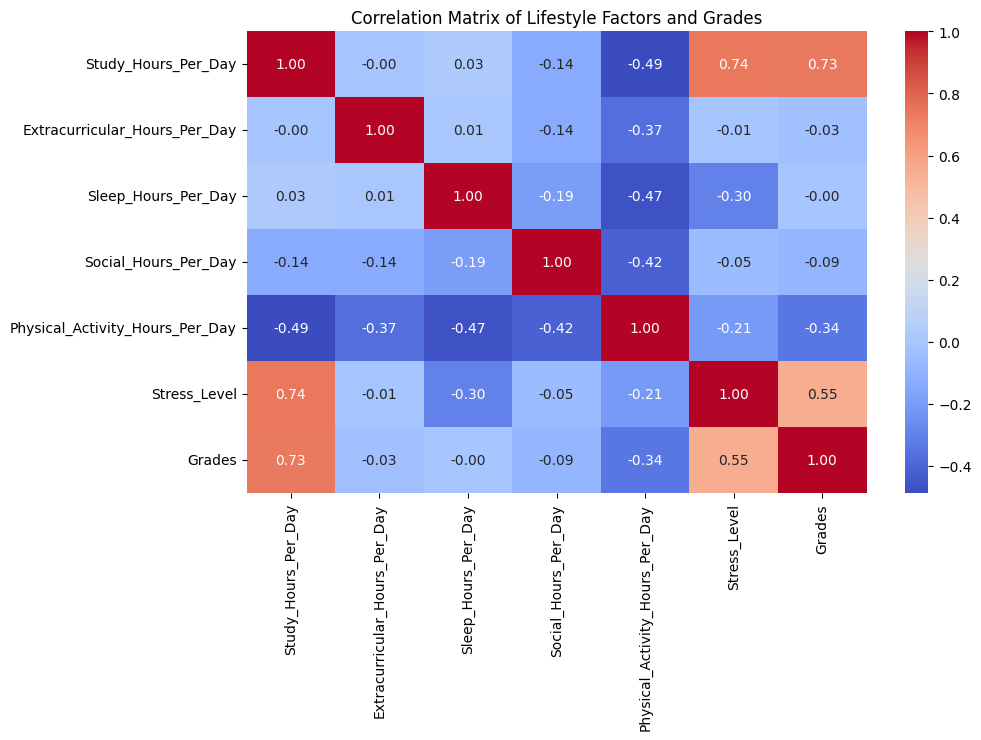

In [13]:
# Copy the dataframe to avoid modifying the original
df_corr = df.copy()

# Encode 'Stress_Level' into numerical scale
stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_corr['Stress_Level'] = df_corr['Stress_Level'].map(stress_mapping)

# If 'Gender' is also a string and you want to include it, encode it too (optional)
# gender_mapping = {'Male': 0, 'Female': 1}
# df_corr['Gender'] = df_corr['Gender'].map(gender_mapping)

# Now plot the correlation heatmap
plt.figure(figsize=(10, 6))
corr = df_corr[lifestyle_cols + ['Grades']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Lifestyle Factors and Grades")
plt.show()


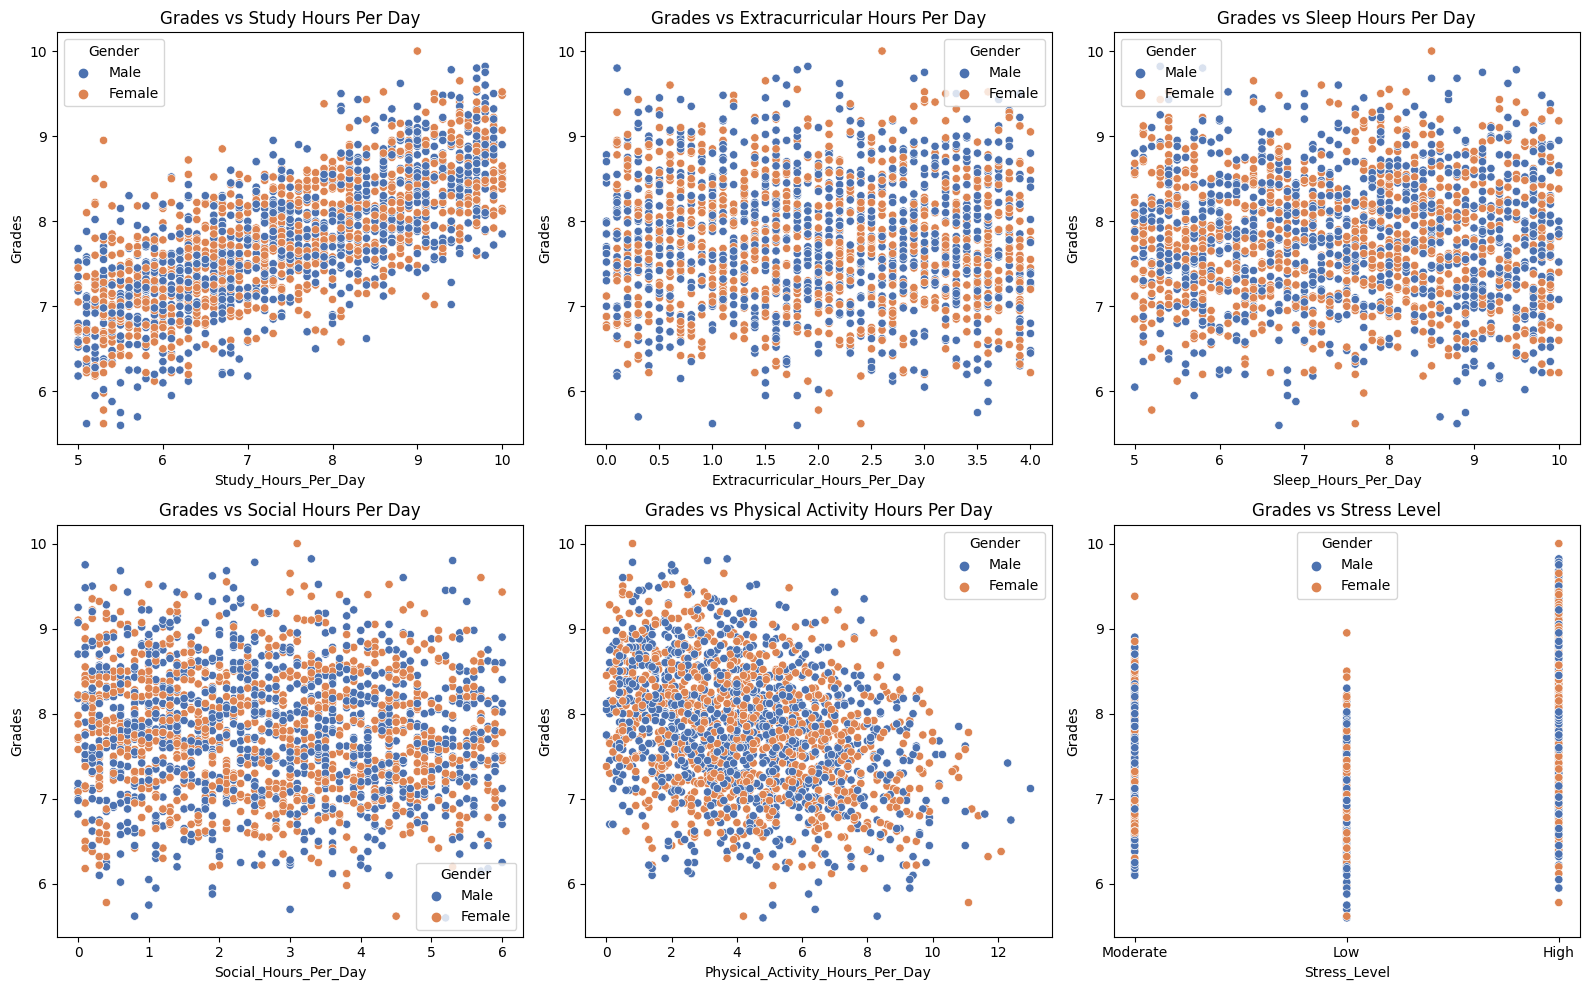

In [14]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(lifestyle_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='Grades', hue='Gender', palette='deep')
    plt.title(f'Grades vs {col.replace("_", " ")}')

plt.tight_layout()
plt.show()


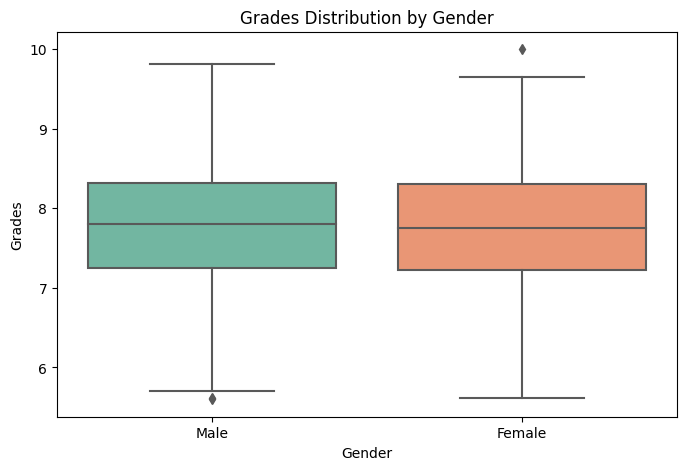

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Grades', palette='Set2')
plt.title('Grades Distribution by Gender')
plt.show()


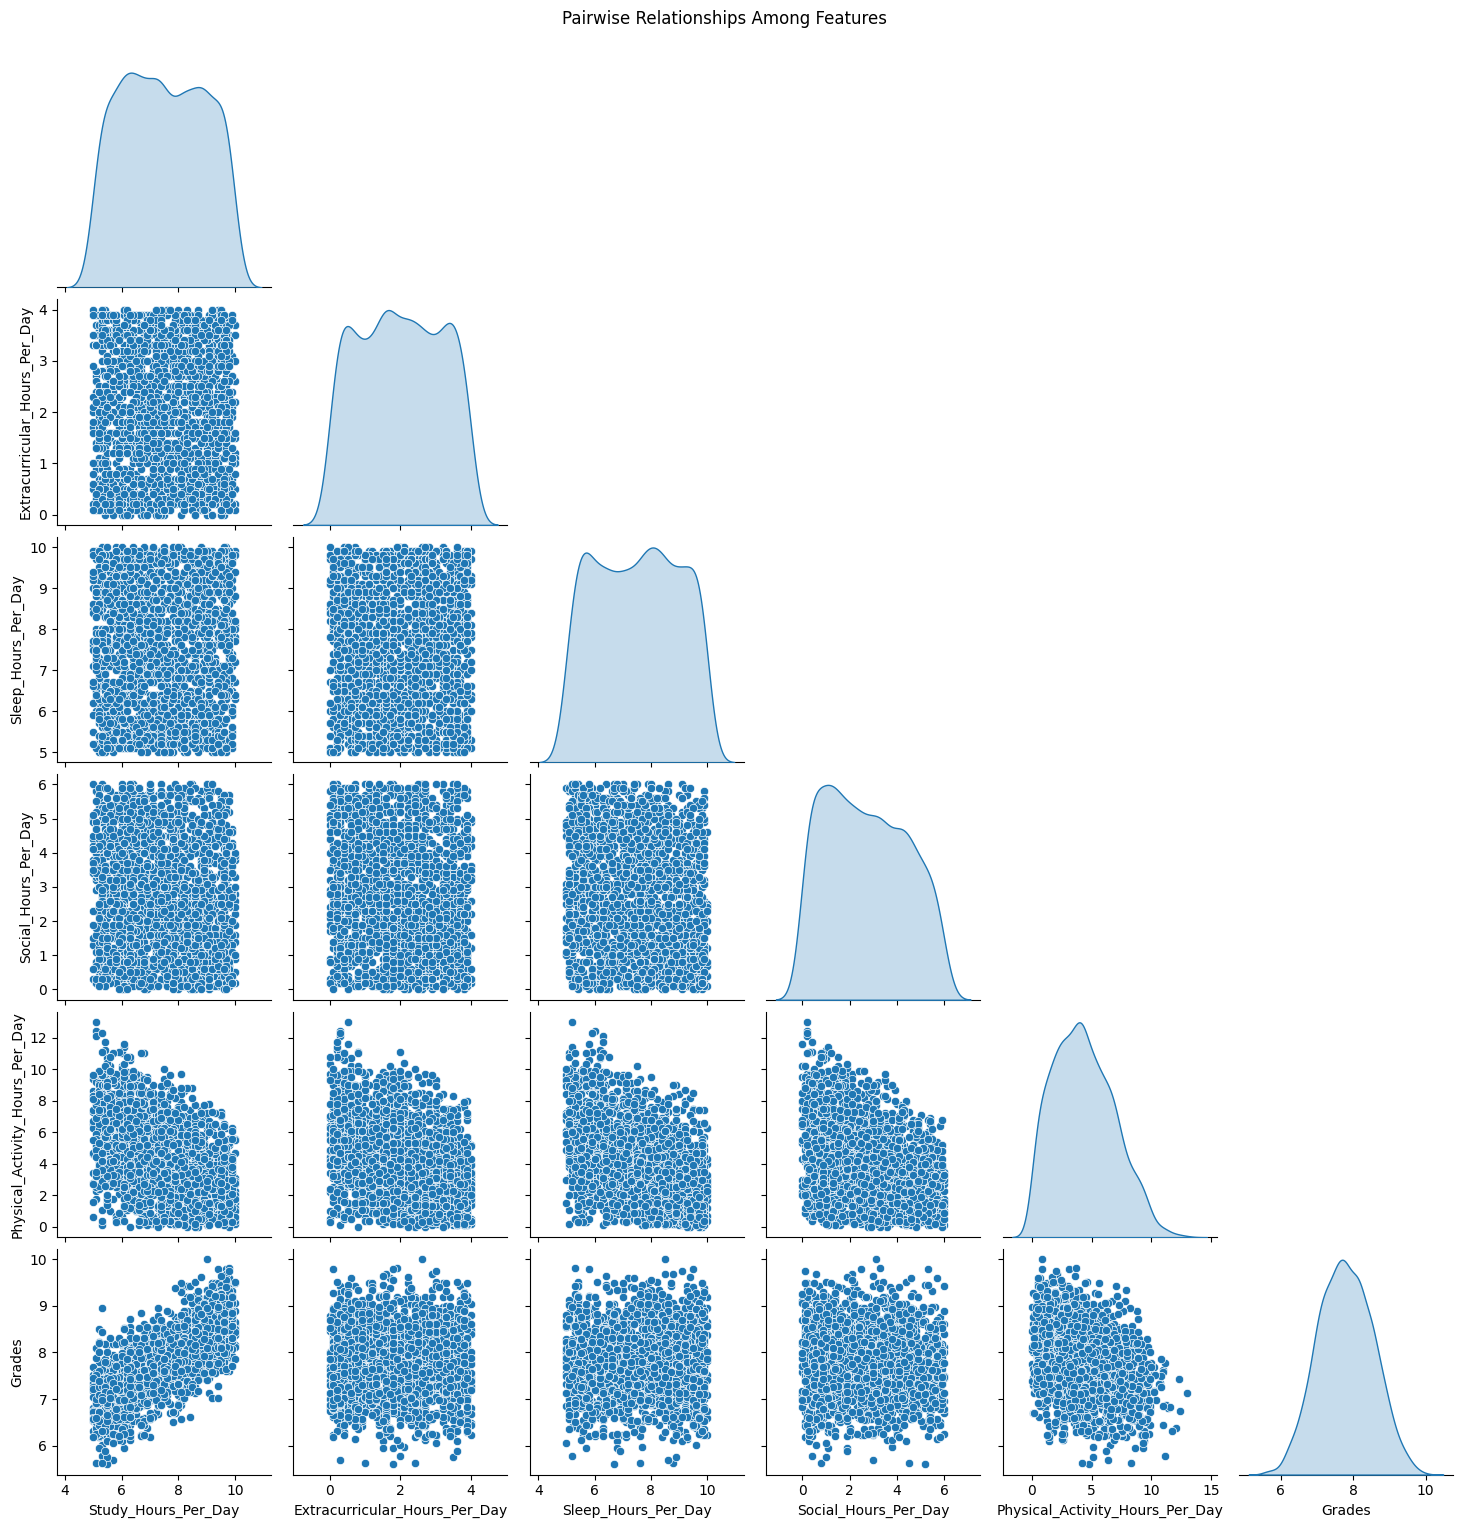

In [16]:
sns.pairplot(df[lifestyle_cols + ['Grades']], corner=True, diag_kind='kde')
plt.suptitle("Pairwise Relationships Among Features", y=1.02)
plt.show()


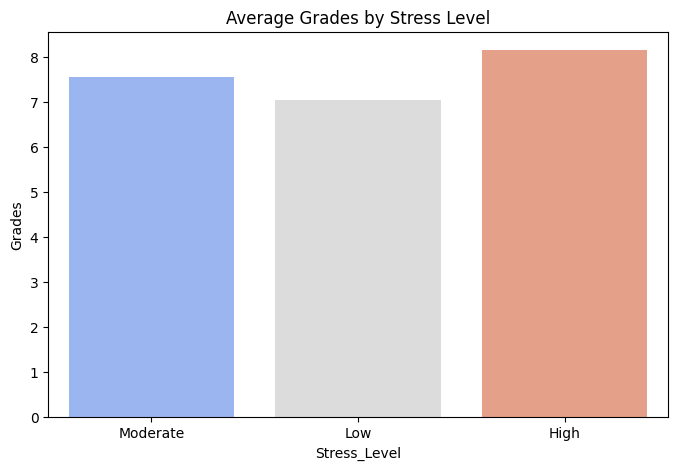

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Stress_Level', y='Grades', ci=None, palette='coolwarm')
plt.title("Average Grades by Stress Level")
plt.show()


## Predictive modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [19]:
# Selecting the feature columns and target variable
features = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
            'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']

# One-hot encoding the Gender column and appending it to features
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
if 'Gender_Male' in df_encoded.columns:
    features.append('Gender_Male')

X = df_encoded[features]
y = df_encoded['Grades']  # Assuming 'Grades' is the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Modify models list for regression tasks
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
}

# Iterate through models to fit, predict, and evaluate
for name, model in models.items():
    print(f"\nModel: {name}")
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(X_test)
    
    # Evaluate using R2 and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'R-squared: {r2:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')


Model: Linear Regression
R-squared: 0.547
Mean Absolute Error: 0.411

Model: Decision Tree Regressor
R-squared: -0.007
Mean Absolute Error: 0.623

Model: Random Forest Regressor
R-squared: 0.457
Mean Absolute Error: 0.454

Model: Support Vector Regressor
R-squared: 0.538
Mean Absolute Error: 0.416


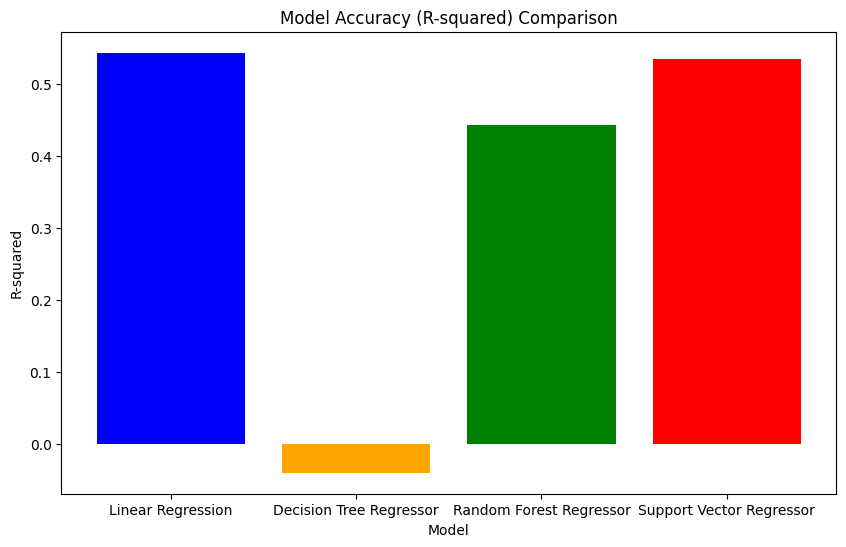

In [21]:
import matplotlib.pyplot as plt

# Store the R-squared values and model names
models_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor']
r2_scores = [0.543, -0.040, 0.442, 0.534]  # Replace with your R-squared values

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models_names, r2_scores, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Accuracy (R-squared) Comparison')

# Display the plot
plt.show()


## Thank you...pls upvote!!!